# Neural Network for Sentiment Analysis

## Experimenting with word embeddings

In [1]:
import numpy as np
import pandas as pd
import dill as pickle
from nn import neuralNetwork
from train_test import train_nn, evaluate_nn
from utils_word_embeddings import get_mean_embedding
from nltk.tokenize import word_tokenize
import gensim

### Loading data

In [2]:
training_file = "./sephora-data/sa-reviews_training.csv"
dev_file = "./sephora-data/sa-reviews_dev.csv"
test_file = "./sephora-data/sa-reviews_test.csv"

In [3]:
df_training = pd.read_csv(training_file)
df_dev = pd.read_csv(dev_file)
df_test = pd.read_csv(test_file)

In [4]:
#there is a review in Russian that after many trials, is still being saved in the final file
df_training.dropna(inplace=True) 
df_training = df_training.reset_index(drop = True)

### Loading WE model

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format('./models/GoogleNews-vectors-negative300.bin', binary=True)

### Extracting word embeddings

In [6]:
# tokenizing the text in review(tokenization)
df_training['tokenized_text'] = df_training['preprocessed_text'].apply(word_tokenize)
df_dev['tokenized_text'] = df_dev['preprocessed_text'].apply(word_tokenize)
df_test['tokenized_text'] = df_test['preprocessed_text'].apply(word_tokenize)

# getting word embeddings for each review
df_training['review_embedding'] = df_training['tokenized_text'].apply(get_mean_embedding)
df_dev['review_embedding'] = df_dev['tokenized_text'].apply(get_mean_embedding)
df_test['review_embedding'] = df_test['tokenized_text'].apply(get_mean_embedding)


In [7]:
# Prepare input for neural network
feat_vectorized_train = np.stack(df_training['review_embedding'].to_numpy())
gold_labels_train = df_training['label'].to_numpy()
feat_vectorized_dev = np.stack(df_dev['review_embedding'].to_numpy())
gold_labels_dev = df_dev['label'].to_numpy()
feat_vectorized_test = np.stack(df_test['review_embedding'].to_numpy())
gold_labels_test = df_test['label'].to_numpy()

### Defining the Neural Network parameters

In [8]:
# number of input, hidden and output nodes
input_nodes = model.vector_size #this is the size of the word embedding vector applied to extract the mean we
hidden_nodes = 100
output_nodes = 1

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Training the Neural Network

Epoch 1/5, Elapsed Time: 0:00:03, Accuracy: 0.7996699475452349
Epoch 2/5, Elapsed Time: 0:00:05, Accuracy: 0.8078917899451877
Epoch 3/5, Elapsed Time: 0:00:03, Accuracy: 0.8116638179996464
Epoch 4/5, Elapsed Time: 0:00:03, Accuracy: 0.8125773560440855
Epoch 5/5, Elapsed Time: 0:00:03, Accuracy: 0.8143160252254377


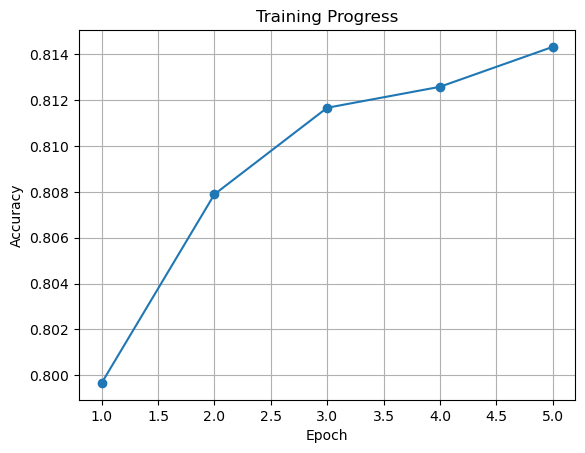

In [9]:
epochs = 5
nn_mean_we = train_nn(n, feat_vectorized_train, gold_labels_train, epochs)

In [10]:
# saving the trained neural network to a file
pkl_filename = './models/nn_mean_we_model_300d.pkl'
with open(pkl_filename, 'wb') as file:
     pickle.dump(nn_mean_we, file)

### Evaluating the perfomance on validation set

In [11]:
pkl_filename = './models/nn_mean_we_model_300d.pkl'
# load from file
with open(pkl_filename, 'rb') as file:
    nn_mean_we_model = pickle.load(file)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      2986
           1       0.70      0.91      0.80      3003

    accuracy                           0.76      5989
   macro avg       0.79      0.76      0.76      5989
weighted avg       0.79      0.76      0.76      5989

[[1829 1157]
 [ 256 2747]]


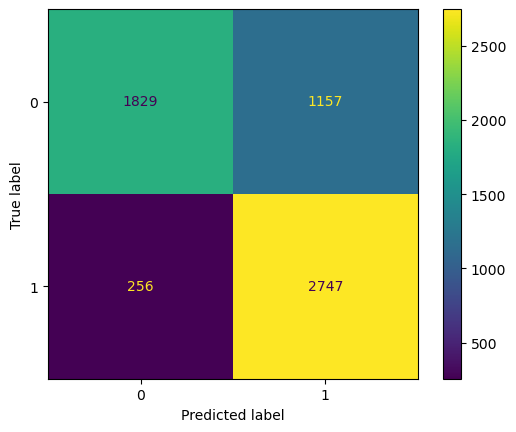

In [12]:
evaluate_nn(nn_mean_we_model, feat_vectorized_dev, gold_labels_dev)

### Evaluation on test dataset

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.97      0.77      4993
           1       0.94      0.43      0.59      4988

    accuracy                           0.70      9981
   macro avg       0.79      0.70      0.68      9981
weighted avg       0.79      0.70      0.68      9981

[[4866  127]
 [2848 2140]]


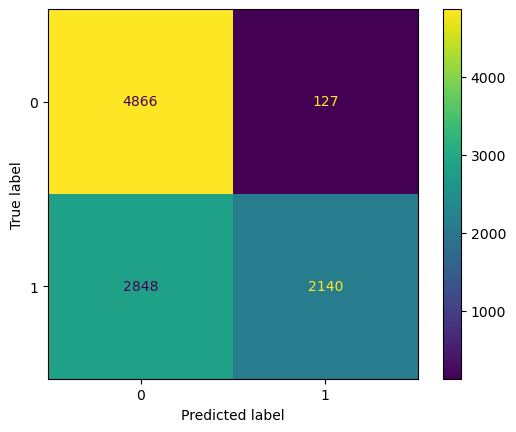

In [13]:
evaluate_nn(nn_mean_we_model, feat_vectorized_test, gold_labels_test)